<a href="https://colab.research.google.com/github/EstefRZ99/rocket-girls-workshop/blob/main/Taller_Rocket_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

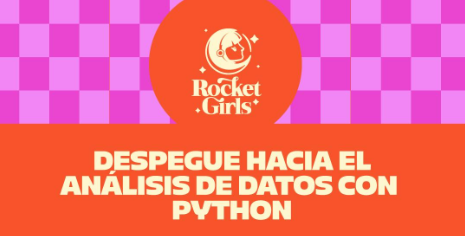

# Despegue hacia el análisis de datos con Python:: ♥ 🚀

# **Descargar librerías**

Cada una de esas líneas importa una herramienta que vamos a usar en el notebook.


-Pandas es la librería estándar en Python para trabajar con datos tabulares (“hojas de cálculo” en memoria). Con ella creas y manipulas DataFrame, filtras, agrupas, calculas estadísticas, etc.
from IPython.display import display


-En Jupyter o Colab, display() muestra objetos (como DataFrames o gráficos) de forma más bonita que print(). Permite, por ejemplo, que un DataFrame aparezca como tabla con scroll, o que las imágenes se rendericen inline.


-import matplotlib.pyplot as plt
Matplotlib es la librería “madre” de visualización en Python; pyplot es su interfaz que emula la forma de trabajar de MATLAB. Con plt dibujas gráficas, configuras títulos, ejes, leyendas, etc.


-import seaborn as sns
Seaborn está construido sobre matplotlib y ofrece gráficos estadísticos con estilos más atractivos por defecto (mapas de calor, distribuciones, pares de gráficos, etc.). Usamos el alias sns para llamarlo rápidamente.

# Paso 1 .Configurar el entorno

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

En el código de pandas, df es simplemente el nombre que solemos dar a la variable que guarda un DataFrame, que es la estructura tabular (filas y columnas) con tus datos. Por ejemplo:

from sklearn.datasets import fetch_california_housing
– Le dice a Python: “Quiero usar la función fetch_california_housing que viene dentro del módulo datasets de scikit‑learn”.
– scikit‑learn es una librería muy popular para machine learning y análisis de datos.


as_frame=True
– Con este parámetro le decimos: “En lugar de devolver arrays de NumPy, entrégame todo ya listo como un DataFrame de pandas”.
– Un DataFrame es como una hoja de cálculo en Python: tiene filas, columnas con nombre y permite hacer limpiezas y gráficos muy fácilmente.

# 2. Cargar Dataset


In [ ]:
# ## 2. Cargar el dataset de California Housing
# Usamos as_frame=True para obtener un DataFrame directamente
data = fetch_california_housing(as_frame=True)
df = data.frame

# Qué significa cada columna

MedInc: ingreso medio del grupo de manzanas (en decenas de miles de dólares).

HouseAge: antigüedad mediana de las viviendas en el grupo (en años).

AveRooms: número promedio de habitaciones por hogar.

AveBedrms: número promedio de dormitorios por hogar.

Population: población total del grupo de manzanas.

AveOccup: número promedio de ocupantes por hogar.

Latitude: latitud geográfica del grupo de manzanas.

Longitude: longitud geográfica del grupo de manzanas.

MedHouseVal: valor medio de la vivienda en el grupo (en decenas de miles de dólares).

# 3.Inspeccionar rápidamente

In [ ]:
# ## 3. Inspección inicial
# Info: tipos de columnas y valores no nulos
print("=== Información del DataFrame ===")
df.info()
# Primeras filas para ver cómo luce la tabla
print("\n=== Primeras 5 filas ===")
display(df.head())

=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

=== Primeras 5 filas ===


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Qué significa cada resultado ❤

1.“20640 entries, 0 to 20639”

-Significa que tienes 20 640 casas anotadas, numeradas de la 0 a la 20 639.

2.“total 9 columns”

-Hay 9 columnas, es decir, 9 cosas distintas que registramos de cada casa (como ingreso medio, edad de la casa, número de cuartos, etc.).


3.“Non-Null Count”

-Cada columna dice cuántos de esos 20 640 valores no están vacíos. Como todas muestran “20640 non-null”, quiere decir que no falta ningún dato en ninguna columna.


4.“Dtype: float64”

-“float64” es solo la forma elegante de decir “número con decimales”. Las 9 columnas guardan números con decimales (por eso aparecen cosas como 8.3252).


5“memory usage: 1.4 MB”

-Es cuánta “memoria” (espacio en el ordenador) usa todo ese cuaderno: 1.4 megabytes, que es muy poco, así que el cuaderno cabe fácil en la computadora.

# Resumen: Esas dos líneas sirven para explorar rápidamente el DataFrame
df.info()

Muestra un resumen de la estructura:

Cantidad de filas y columnas

Nombre y tipo de cada columna

Cuántos valores no nulos tiene cada columna

Uso aproximado de memoria

## 4. limpiar y preparar

In [ ]:
df = df.drop_duplicates().dropna()


# 1. Eliminar filas duplicadas:
drop_duplicates() busca filas que sean exactamente iguales (idénticas en todas las columnas).

Elimina las filas repetidas y deja solo una fila única de cada conjunto de filas duplicadas.

# 2. Eliminar filas con datos faltantes (NaN):
dropna() revisa cada fila para detectar valores faltantes o NaN (Not a Number).

Si encuentra al menos un valor faltante en alguna columna de la fila, elimina toda esa fila.



# 5.Exploración detallada y análisis exploratorio de datos (EDA)

df.describe() genera estadísticas resumidas exclusivamente para columnas numéricas.

Incluye conteo (count), promedio (mean), desviación estándar (std), valores mínimos y máximos (min, max), y los percentiles (25%, 50%, 75%).

df.describe(include='all')
Muestra estadísticas tanto de variables numéricas como no numéricas (categóricas, booleanas, de fecha, etc.).

Es útil para análisis exploratorio cuando querés ver:

Cuántos valores únicos hay en columnas categóricas.

Cuál es el valor más frecuente.

Con qué frecuencia aparece.

Y los estadísticos normales en columnas numéricas.

In [ ]:
# ## 4. Estadísticos descriptivos
# Nos ayudan a identificar rangos y posibles outliers
print("\n=== Estadísticos descriptivos (numéricos) ===")
display(df.describe())

# Si quisieras incluir también variables no numéricas:
print("\n=== Estadísticos descriptivos (todas) ===")
display(df.describe(include='all'))




=== Estadísticos descriptivos (numéricos) ===


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



=== Estadísticos descriptivos (todas) ===


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Análisis de la columna MedInc (Ingreso medio por bloque)**


Imagina que cada bloque es una “caja” con un valor de ingreso medio. Estas métricas nos ayudan a entender cómo se distribuyen esos valores.

1. Cantidad de datos (count)
¿Qué mide? Cuántos bloques tenemos registrados.

Ejemplo: 20 640 → Hay 20 640 cajas con un valor de ingreso medio.

2. Promedio (mean)
¿Qué mide? El valor típico si sumas todos los ingresos y los divides entre la cantidad de bloques.

Ejemplo: 3.87 → $38 700

¿Cómo entenderlo? Si repartieras equitativamente el ingreso total entre todas las cajas, cada una tendría unos $38 700.

3. Desviación estándar (std)
¿Qué mide? Qué tanto se alejan, en promedio, los ingresos individuales del promedio.

Ejemplo: 1.90 → $19 000

¿Cómo entenderlo? La mayoría de las cajas están a unos $19 000 por encima o por debajo de esos $38 700.

4. Valor mínimo (min)
¿Qué mide? El ingreso más bajo registrado.

Ejemplo: 0.4999 → $4 999

¿Cómo entenderlo? Hay al menos una caja que solo llega a $4 999 de ingreso medio.

5. Primer cuartil (25 %)
¿Qué mide? El punto por debajo del cual está el 25 % de las cajas.

Ejemplo: 2.5634 → $25 634

¿Cómo entenderlo? Una de cada cuatro cajas gana $25 634 o menos.

6. Mediana (50 %)
¿Qué mide? El valor central: la mitad de las cajas queda por debajo y la mitad por encima.

Ejemplo: 3.5348 → $35 348

¿Cómo entenderlo? Dos de cada cuatro cajas (o la mitad) ganan $35 348 o menos.

7. Tercer cuartil (75 %)
¿Qué mide? El punto por debajo del cual está el 75 % de las cajas.

Ejemplo: 4.7433 → $47 433

¿Cómo entenderlo? Tres de cada cuatro cajas ganan $47 433 o menos.

8. Valor máximo (max)
¿Qué mide? El ingreso más alto registrado.

Ejemplo: 15.0001 → $150 001

¿Cómo entenderlo? Hay al menos una caja que llega a $150 001 de ingreso medio.



# 6. Visualización de Datos

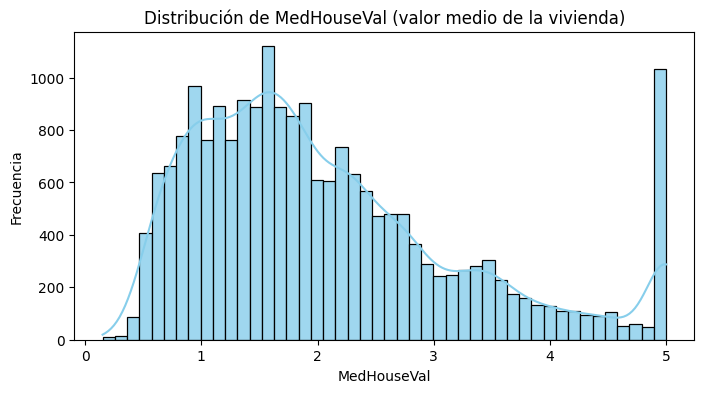

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(
    df['MedHouseVal'],    # Columna a graficar
    kde=True,             # Línea KDE
    color='skyblue',      # Color de las barras y la línea
    edgecolor='black',    # Borde de las barras
    alpha=0.8             # Transparencia
)  # ¡Cierra aquí el paréntesis de sns.histplot!
plt.title('Distribución de MedHouseVal (valor medio de la vivienda)')
plt.xlabel('MedHouseVal')
plt.ylabel('Frecuencia')
plt.show()

# Ese bloque de código sirve para ver cómo se distribuyen los valores de la columna MedHouseVal (el precio medio de la vivienda

Pasos

plt.figure(figsize=(8, 4))
Crea un lienzo de 8×4 pulgadas, ajustando el tamaño de la gráfica para que sea legible.

sns.histplot(df['MedHouseVal'], kde=True)

Histograma (histplot): dibuja barras que muestran cuántas casas (o “bloques”) caen en cada rango de precios.

kde=True: añade una línea suave (estimación de densidad) encima del histograma, para ver la forma “curva” de la distribución.

Etiquetas y título

plt.title(...) ponle un título a la gráfica, para que sepan qué están viendo.

plt.xlabel(...) y plt.ylabel(...) nombran los ejes (precio en el eje X y frecuencia en el eje Y).

plt.show()
Muestra la gráfica en pantalla.



# 1. Gráfico de dispersión (Scatterplot)

plt.figure(figsize=(8, 5))
Crea un lienzo de 8×5 pulgadas para el gráfico, controlando su tamaño.

sns.scatterplot(...)
Dibuja puntos cuya posición en el eje X es el ingreso medio (MedInc) y en el eje Y el valor medio de la vivienda (MedHouseVal).

data=df indica que toma las columnas de tu DataFrame df.

alpha=0.6 fija la transparencia de los puntos para ver mejor zonas muy densas.

plt.title, plt.xlabel, plt.ylabel
Añaden título y etiquetas a los ejes para que quien vea el gráfico entienda qué representa cada dimensión.

plt.show()
Muestra el gráfico en pantalla.

¿Para qué sirve?
Te ayuda a ver si a mayor ingreso promedio de bloque (MedInc) tiende a corresponder un mayor precio de viviendas (MedHouseVal), y detectar patrones o dispersiones.

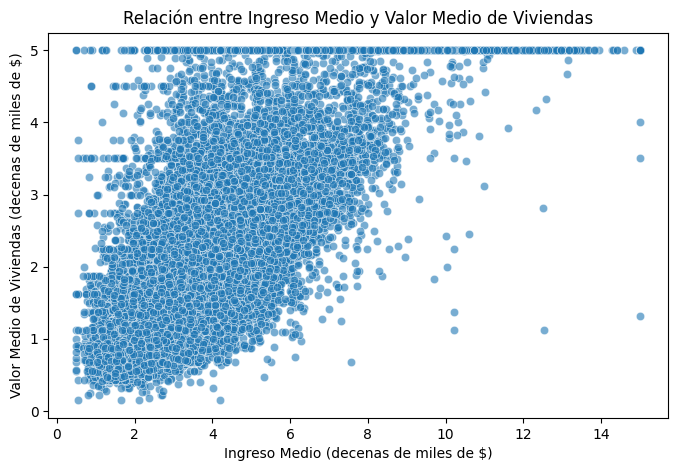

In [ ]:
#1. Gráfico de dispersión (Scatterplot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.6)
plt.title('Relación entre Ingreso Medio y Valor Medio de Viviendas')
plt.xlabel('Ingreso Medio (decenas de miles de $)')
plt.ylabel('Valor Medio de Viviendas (decenas de miles de $)')
plt.show()


# 2. Boxplot de la variable objetivo

sns.boxplot(x=df['MedHouseVal'])
Dibuja un diagrama de caja de la distribución de MedHouseVal:

La caja muestra el rango intercuartílico (25 %–75 %).

La línea interior es la mediana (50 %).

Los “bigotes” y los puntos fuera de ellos señalan posibles outliers.

¿Para qué sirve?
Detectar valores atípicos y entender rápidamente la dispersión y simetría de tu variable objetivo.

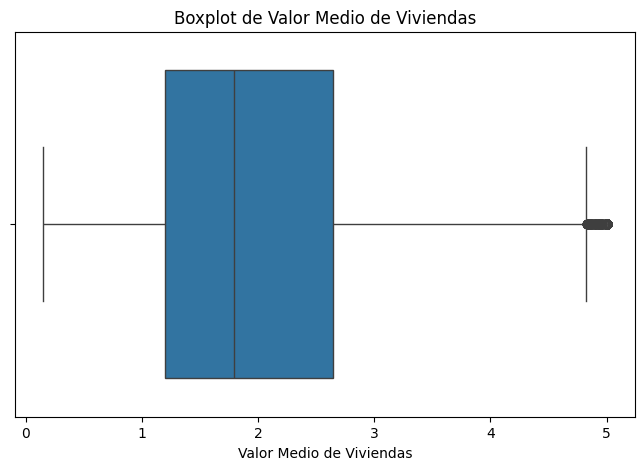

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MedHouseVal'])
plt.title('Boxplot de Valor Medio de Viviendas')
plt.xlabel('Valor Medio de Viviendas')
plt.show()


# 3. Mapa de calor de correlaciones (Heatmap)

df.corr()
Calcula la matriz de correlación entre todas las columnas numéricas del DataFrame.

sns.heatmap(...)
Representa esa matriz como un mapa de calor:

annot=True escribe el coeficiente de correlación en cada celda.

cmap='coolwarm' usa una escala de colores que va de azul (correlación negativa) a rojo (positiva).

fmt='.2f' formatea los números con dos decimales.

¿Para qué sirve?
Te permite identificar de un vistazo qué variables están más relacionadas entre sí (por ejemplo, si MedInc se correlaciona fuertemente con MedHouseVal) y cuáles no aportan información redundante.

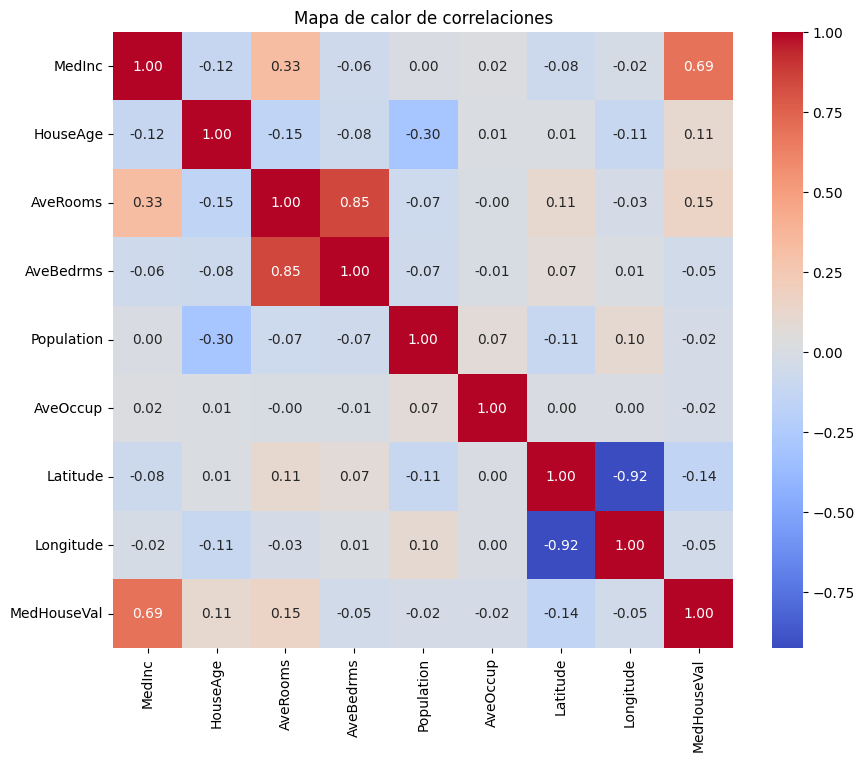

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()


# Visualizaciones y hallazgos clave
Histograma de MedHouseVal

Distribución sesgada a la derecha: hay más bloques con valores de vivienda bajos-medios y unos pocos bloques con valores muy altos (outliers).

Sirve para identificar rangos más frecuentes y posibles valores atípicos.

Scatterplot MedInc vs MedHouseVal

Revela una relación positiva: bloques con mayores ingresos tienden a tener viviendas de mayor valor.

La nube de puntos muestra densidad creciente hacia valores medios, pero sugiere heterogeneidad en los extremos.

Boxplot de MedHouseVal

Destaca la caja (rango intercuartílico) entre $12 000 y $26 500 y la mediana en $18 000.

Aparecen “bigotes” que abarcan gran parte de la distribución y algunos puntos aislados como posibles outliers por encima de $40 000.

Mapa de calor de correlaciones

MedInc y MedHouseVal presentan la correlación más alta dentro del conjunto, reflejando la dependencia ingresos–precio vivienda.

Otras variables (por ejemplo, HouseAge, AveRooms) muestran correlaciones moderadas o bajas, útiles para seleccionar características en un posible modelo predictivo.

(Todas las visualizaciones provienen del análisis con matplotlib y seaborn en el notebook)


# Conclusiones y siguientes pasos
El dataset está limpio y completo, sin valores faltantes.

La distribución de valores medios de vivienda es asimétrica, con unos pocos casos extremos que convendría analizar por separado.

Existe una relación clara entre el ingreso medio del bloque y el valor medio de la vivienda, lo que sugiere que MedInc es una variable predictora fuerte.

Otras variables podrían aportar, pero conviene revisar multicolinealidad (a través de la matriz de correlaciones) antes de construir modelos de regresión.

Recomendaciones:

Explorar transformaciones (logarítmicas) para normalizar variables muy sesgadas.

Detectar y decidir qué hacer con los outliers extremos.

Evaluar modelos de regresión simple y múltiple para predecir MedHouseVal, validando con técnicas de cross-validation.